In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import json
import urllib2

In [2]:
url = 'http://infopangan.jakarta.go.id/api/price/series_by_commodity?public=1&cid=1&m=2&y=2016'
response = urllib2.urlopen(url)
json_obj = response.read()

In [3]:
type(json_obj)

str

In [4]:
data = json.loads(json_obj)

In [5]:
data['data']

[{u'average': u'12000',
  u'high': u'12000',
  u'id': u'3',
  u'low': u'12000',
  u'name': u'Pasar Senen Blok III - VI',
  u'series': {u'1': u'12000',
   u'10': u'12000',
   u'11': u'12000',
   u'12': u'12000',
   u'13': u'12000',
   u'14': u'12000',
   u'15': u'12000',
   u'16': u'12000',
   u'2': u'12000',
   u'3': u'12000',
   u'4': u'12000',
   u'5': u'12000',
   u'6': u'12000',
   u'7': u'12000',
   u'8': u'12000',
   u'9': u'12000'}},
 {u'average': u'11300',
  u'high': u'11300',
  u'id': u'4',
  u'low': u'11300',
  u'name': u'Pasar Jembatan Merah',
  u'series': {u'1': u'11300',
   u'10': u'11300',
   u'11': u'11300',
   u'12': u'11300',
   u'13': u'11300',
   u'14': u'11300',
   u'15': u'11300',
   u'16': u'11300',
   u'2': u'11300',
   u'3': u'11300',
   u'4': u'11300',
   u'5': u'11300',
   u'6': u'11300',
   u'7': u'11300',
   u'8': u'11300',
   u'9': u'11300'}},
 {u'average': u'11207',
  u'high': u'12500',
  u'id': u'5',
  u'low': u'10000',
  u'name': u'Pasar Sunter Podomoro'

In [6]:
dframe = DataFrame(data['data'])

In [7]:
dframe

,average,high,id,low,name,series
0,12000,12000,3,12000,Pasar Senen Blok III - VI,"{u'11': u'12000', u'10': u'12000', u'13': u'12..."
1,11300,11300,4,11300,Pasar Jembatan Merah,"{u'11': u'11300', u'10': u'11300', u'13': u'11..."
2,11207,12500,5,10000,Pasar Sunter Podomoro,"{u'11': u'10000', u'13': u'10500', u'12': u'10..."
3,10063,11000,6,10000,Pasar Rawa Badak,"{u'11': u'10000', u'10': u'10000', u'13': u'10..."
4,12500,12500,7,12500,Pasar Grogol,"{u'11': u'12500', u'10': u'12500', u'13': u'12..."
5,13000,13000,9,13000,Pasar Minggu,"{u'11': u'13000', u'10': u'13000', u'13': u'13..."
6,12000,12000,10,12000,Pasar Mayestik,"{u'11': u'12000', u'10': u'12000', u'13': u'12..."
7,11000,11000,11,11000,Pasar Pramuka,"{u'11': u'11000', u'10': u'11000', u'13': u'11..."
8,11313,11800,12,11000,Pasar Kramat Jati,"{u'11': u'11800', u'10': u'11400', u'13': u'11..."
9,10500,10500,13,10500,Pasar Jatinegara,"{u'11': u'10500', u'10': u'10500', u'13': u'10..."


In [8]:
dframe['series'][0]

{u'1': u'12000',
 u'10': u'12000',
 u'11': u'12000',
 u'12': u'12000',
 u'13': u'12000',
 u'14': u'12000',
 u'15': u'12000',
 u'16': u'12000',
 u'2': u'12000',
 u'3': u'12000',
 u'4': u'12000',
 u'5': u'12000',
 u'6': u'12000',
 u'7': u'12000',
 u'8': u'12000',
 u'9': u'12000'}

In [9]:
df = pd.io.json.json_normalize(data['data'], 'series', 'name')
df.columns = ['tanggal', 'pasar']
df

,tanggal,pasar
0,11,Pasar Senen Blok III - VI
1,10,Pasar Senen Blok III - VI
2,13,Pasar Senen Blok III - VI
3,12,Pasar Senen Blok III - VI
4,15,Pasar Senen Blok III - VI
5,14,Pasar Senen Blok III - VI
6,16,Pasar Senen Blok III - VI
7,1,Pasar Senen Blok III - VI
8,3,Pasar Senen Blok III - VI
9,2,Pasar Senen Blok III - VI


In [17]:
df['harga'] = 0

In [18]:
df

,tanggal,pasar,harga
0,11,Pasar Senen Blok III - VI,0
1,10,Pasar Senen Blok III - VI,0
2,13,Pasar Senen Blok III - VI,0
3,12,Pasar Senen Blok III - VI,0
4,15,Pasar Senen Blok III - VI,0
5,14,Pasar Senen Blok III - VI,0
6,16,Pasar Senen Blok III - VI,0
7,1,Pasar Senen Blok III - VI,0
8,3,Pasar Senen Blok III - VI,0
9,2,Pasar Senen Blok III - VI,0


In [12]:
dframe[dframe['name'] == 'Pasar Jatinegara']['series']

9    {u'11': u'10500', u'10': u'10500', u'13': u'10...
Name: series, dtype: object

In [13]:
dframe[dframe['name'] == 'Pasar Jatinegara']['series'].iloc[0]

{u'1': u'10500',
 u'10': u'10500',
 u'11': u'10500',
 u'12': u'10500',
 u'13': u'10500',
 u'14': u'10500',
 u'15': u'10500',
 u'16': u'10500',
 u'2': u'10500',
 u'3': u'10500',
 u'4': u'10500',
 u'5': u'10500',
 u'6': u'10500',
 u'7': u'10500',
 u'8': u'10500',
 u'9': u'10500'}

In [14]:
dframe[dframe['name'] == 'Pasar Jatinegara']['series'].iloc[0][str(11)]

u'10500'

In [19]:
df

,tanggal,pasar,harga
0,11,Pasar Senen Blok III - VI,0
1,10,Pasar Senen Blok III - VI,0
2,13,Pasar Senen Blok III - VI,0
3,12,Pasar Senen Blok III - VI,0
4,15,Pasar Senen Blok III - VI,0
5,14,Pasar Senen Blok III - VI,0
6,16,Pasar Senen Blok III - VI,0
7,1,Pasar Senen Blok III - VI,0
8,3,Pasar Senen Blok III - VI,0
9,2,Pasar Senen Blok III - VI,0


In [43]:
for index,row in df.iterrows():
    tanggal = row['tanggal']
    pasar = row['pasar']
    harga = dframe[dframe['name'] == pasar]['series'].iloc[0][str(tanggal)]
    df['harga'][index] = harga

/Users/aftahismail/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

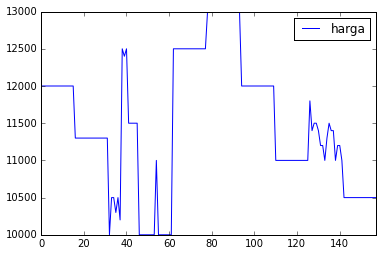

In [49]:
df.plot()

In [50]:
df

,tanggal,pasar,harga
0,11,Pasar Senen Blok III - VI,12000
1,10,Pasar Senen Blok III - VI,12000
2,13,Pasar Senen Blok III - VI,12000
3,12,Pasar Senen Blok III - VI,12000
4,15,Pasar Senen Blok III - VI,12000
5,14,Pasar Senen Blok III - VI,12000
6,16,Pasar Senen Blok III - VI,12000
7,1,Pasar Senen Blok III - VI,12000
8,3,Pasar Senen Blok III - VI,12000
9,2,Pasar Senen Blok III - VI,12000


In [73]:
df['tanggalint'] = 0
df

,tanggal,pasar,harga,tanggalint
0,11,Pasar Senen Blok III - VI,12000,0
1,10,Pasar Senen Blok III - VI,12000,0
2,13,Pasar Senen Blok III - VI,12000,0
3,12,Pasar Senen Blok III - VI,12000,0
4,15,Pasar Senen Blok III - VI,12000,0
5,14,Pasar Senen Blok III - VI,12000,0
6,16,Pasar Senen Blok III - VI,12000,0
7,1,Pasar Senen Blok III - VI,12000,0
8,3,Pasar Senen Blok III - VI,12000,0
9,2,Pasar Senen Blok III - VI,12000,0


In [74]:
for index,row in df.iterrows():
    tanggal = row['tanggal']
    df['tanggalint'][index] = int(tanggal)

/Users/aftahismail/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [79]:
df = df.sort(columns='tanggalint')

In [83]:
del df['tanggal']

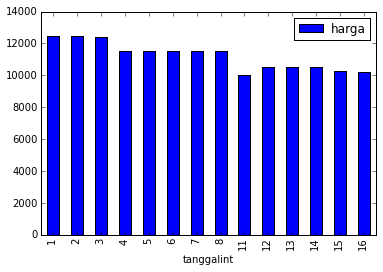

In [103]:
df[(df['pasar']=='Pasar Sunter Podomoro')].plot(x='tanggalint', y='harga',kind='bar',stacked=True)

In [93]:
df

,pasar,harga,tanggalint
101,Pasar Mayestik,12000,1
69,Pasar Grogol,12500,1
117,Pasar Pramuka,11000,1
53,Pasar Rawa Badak,10000,1
85,Pasar Minggu,13000,1
7,Pasar Senen Blok III - VI,12000,1
133,Pasar Kramat Jati,11000,1
38,Pasar Sunter Podomoro,12500,1
23,Pasar Jembatan Merah,11300,1
149,Pasar Jatinegara,10500,1


In [108]:
df = df[['tanggalint','pasar','harga']]

In [115]:
df = df.sort(columns=['pasar','tanggalint'])

In [121]:
df

,tanggalint,pasar,harga
69,1,Pasar Grogol,12500
71,2,Pasar Grogol,12500
70,3,Pasar Grogol,12500
73,4,Pasar Grogol,12500
72,5,Pasar Grogol,12500
75,6,Pasar Grogol,12500
74,7,Pasar Grogol,12500
77,8,Pasar Grogol,12500
76,9,Pasar Grogol,12500
63,10,Pasar Grogol,12500


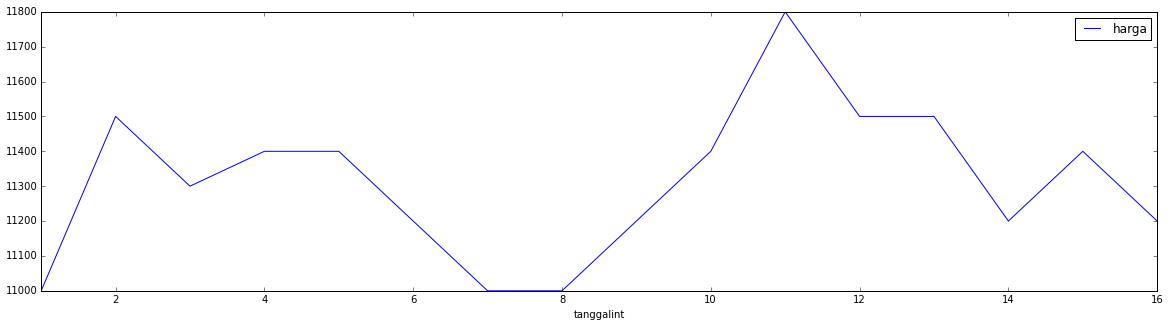

In [128]:
df[df['pasar']=='Pasar Kramat Jati'].plot(y='harga',x='tanggalint', figsize={5,20}, kind='line')

In [144]:
df['harga x tanggal'] = np.nan

for index,row in df.iterrows():
    tanggal = row['tanggalint']
    pasar = row['pasar']
    harga = int(dframe[dframe['name'] == pasar]['series'].iloc[0][str(tanggal)])
    row['harga x tanggal'] = tanggal * harga
    
df

,tanggalint,pasar,harga,harga x tanggal
69,1,Pasar Grogol,12500,NaN
71,2,Pasar Grogol,12500,NaN
70,3,Pasar Grogol,12500,NaN
73,4,Pasar Grogol,12500,NaN
72,5,Pasar Grogol,12500,NaN
75,6,Pasar Grogol,12500,NaN
74,7,Pasar Grogol,12500,NaN
77,8,Pasar Grogol,12500,NaN
76,9,Pasar Grogol,12500,NaN
63,10,Pasar Grogol,12500,NaN
